In [1]:
import pandas as pd
from collections import defaultdict
from Operators.evaluation import *

In [2]:
fitness_path = "fitness_logs_elit_final"
summary_path = "ga_summary_elit_final.csv"

In [3]:
fitness_dfs = load_fitness_logs(fitness_path)

Loaded 9 configurations from 'fitness_logs_elit_final'


In [4]:
fitness_dfs.keys()

dict_keys(['POP=100 XO=0.1 mut_prob=1 mutation=full_position_swap_2teams crossover=crossover_swap_extreme_player selection_alg=roulette_selection elitism=True', 'POP=100 XO=1 mut_prob=0.5 mutation=full_position_swap_2teams crossover=crossover_swap_extreme_player selection_alg=roulette_selection elitism=True', 'POP=100 XO=0.5 mut_prob=1 mutation=full_position_swap_2teams crossover=crossover_swap_extreme_player selection_alg=roulette_selection elitism=True', 'POP=100 XO=1 mut_prob=0.1 mutation=full_position_swap_2teams crossover=crossover_swap_extreme_player selection_alg=roulette_selection elitism=True', 'POP=100 XO=0.5 mut_prob=0.1 mutation=full_position_swap_2teams crossover=crossover_swap_extreme_player selection_alg=roulette_selection elitism=True', 'POP=100 XO=0.5 mut_prob=0.5 mutation=full_position_swap_2teams crossover=crossover_swap_extreme_player selection_alg=roulette_selection elitism=True', 'POP=100 XO=1 mut_prob=1 mutation=full_position_swap_2teams crossover=crossover_swap_

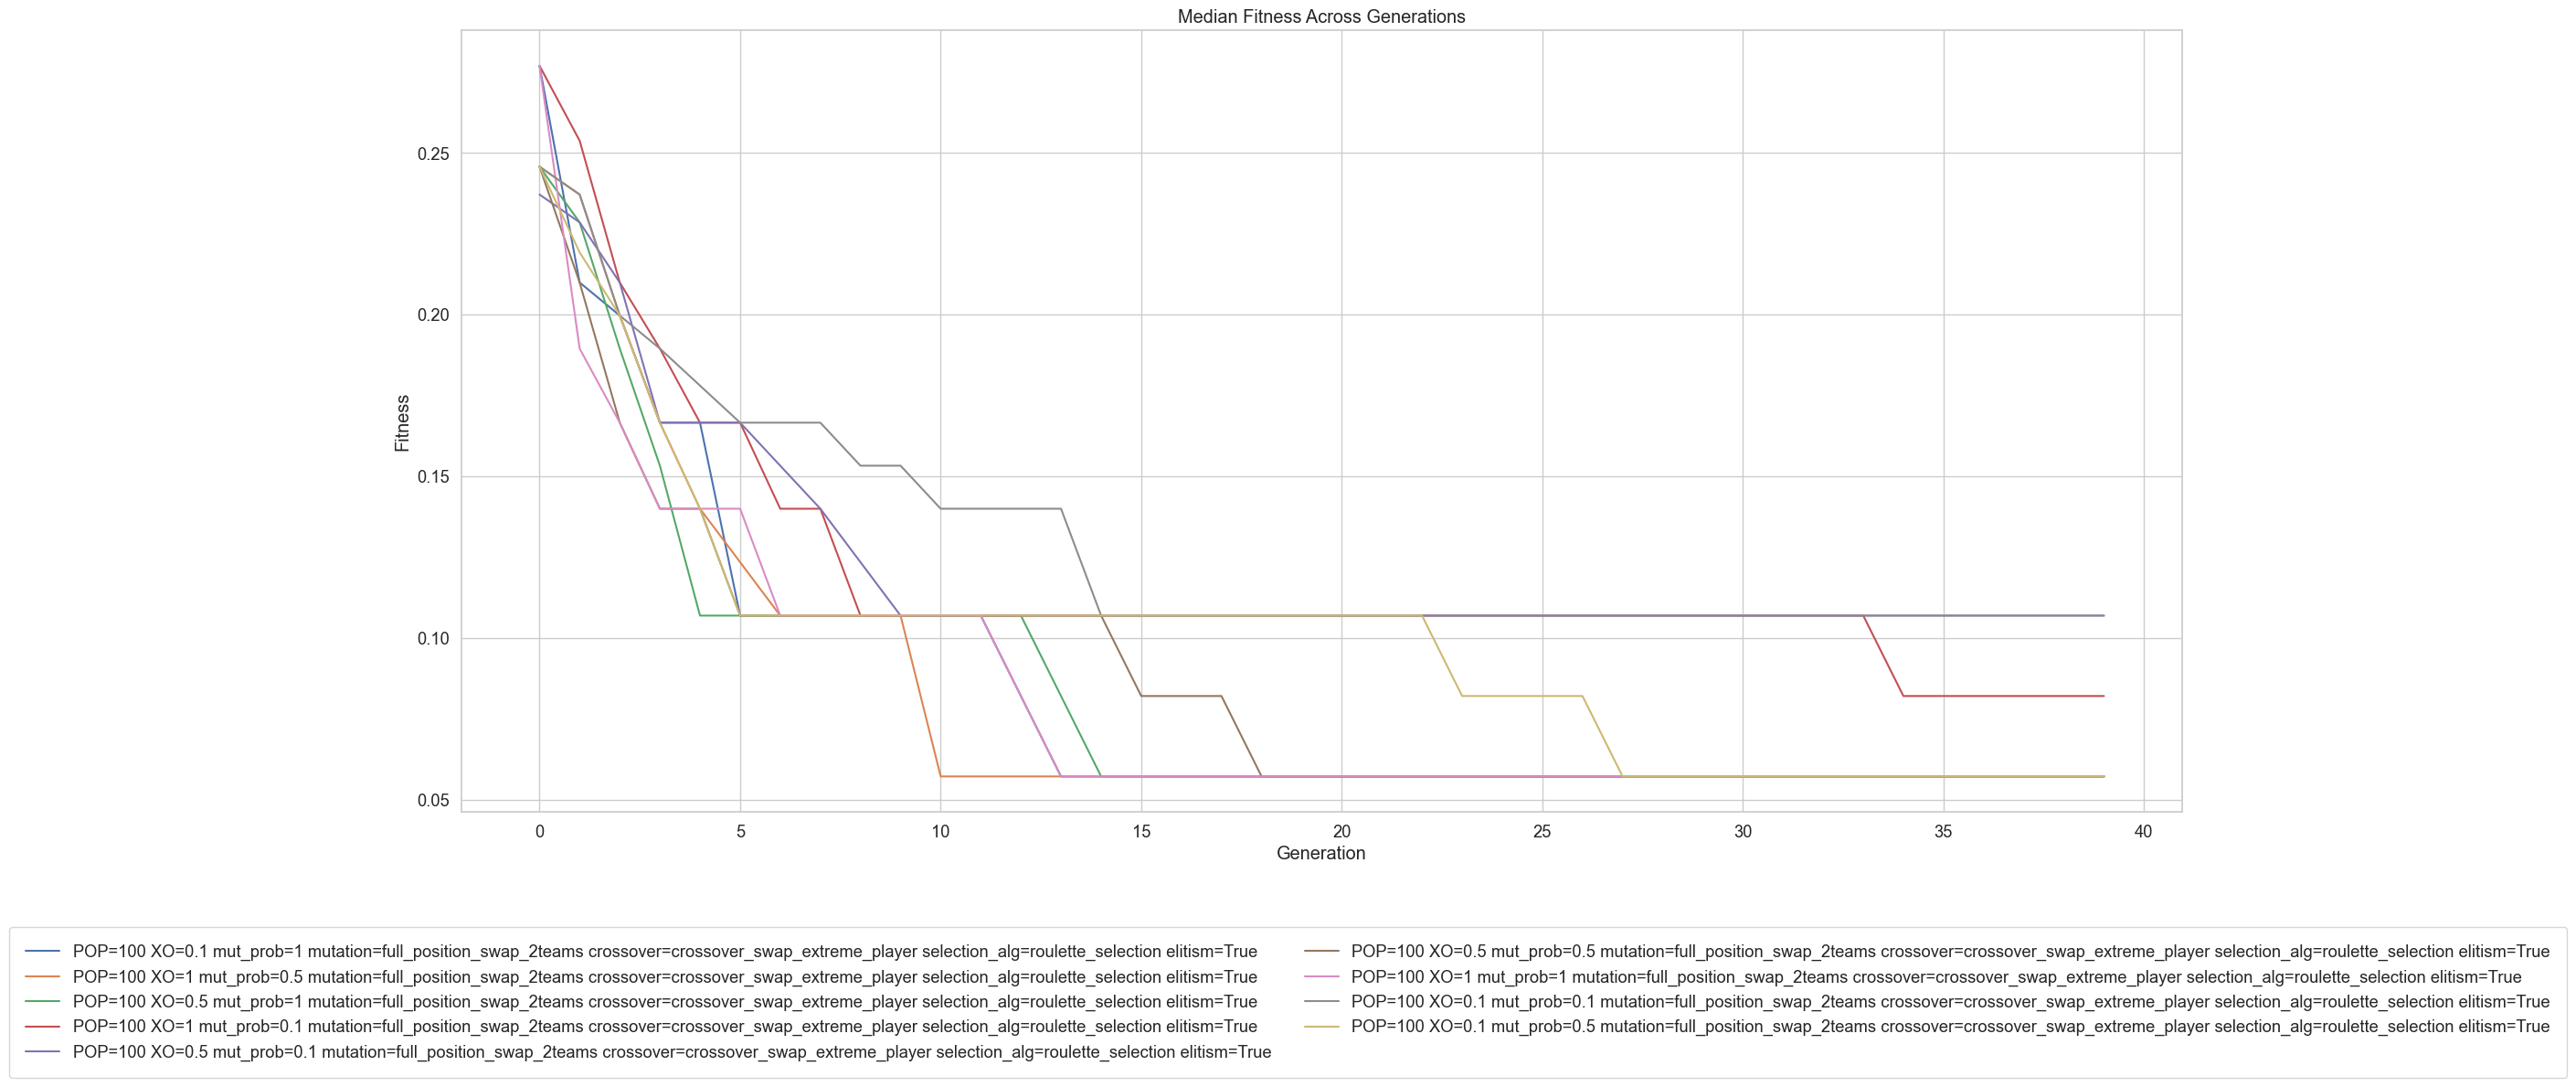

In [5]:
plot_median_fitness_over_gen(fitness_dfs)

## Statistical tests

#### The Friedman test, checks if there’s any significant difference across all configurations,
#### <br> If there are significant difference then  apply the Nemenyi post-hoc test, which compares each pair of configurations


 Friedman Test (non-parametric ANOVA for repeated measures)

Use when: You want to compare 3 or more configurations across repeated runs (e.g., different crossover strategies).

Assumption: Repeated measurements across same conditions.

Output: Tells you if there is a statistically significant difference somewhere in the group.


### Evaluating statistical significance across full hyperparameter configurations
Constraints:
* Same dataset: All configurations are tested on the same dataset
* Same number of runs: Each configuration must have the same number of runs (30)
* Same evaluation metric:  final fitness from each run

Null hypothesis (H₀): All configurations perform equally (no statistically significant difference in performance).

If p < 0.05: You can reject H₀ — at least one configuration performs significantly differently.

In [7]:
labels, results = run_friedman_test_on_best_fitness(fitness_dfs)


Friedman Test Results:
Test Statistic: 52.7593
P-value:        0.0000
Significant difference detected between configurations (reject H₀)


In [8]:
posthoc_results = run_posthoc_nemenyi_from_best_fitness(labels, results)


Post-hoc Nemenyi Test (p-values):
                                                    POP=100 XO=0.1 mut_prob=1 mutation=full_position_swap_2teams crossover=crossover_swap_extreme_player selection_alg=roulette_selection elitism=True  \
POP=100 XO=0.1 mut_prob=1 mutation=full_positio...                                             1.0000                                                                                                    
POP=100 XO=1 mut_prob=0.5 mutation=full_positio...                                             1.0000                                                                                                    
POP=100 XO=0.5 mut_prob=1 mutation=full_positio...                                             1.0000                                                                                                    
POP=100 XO=1 mut_prob=0.1 mutation=full_positio...                                             0.2212                                                        

/Users/juliakarpienia/Desktop/NOVA IMS /2nd sem/CIFO/CIFO_project_groupA/Operators/evaluation.py:281: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


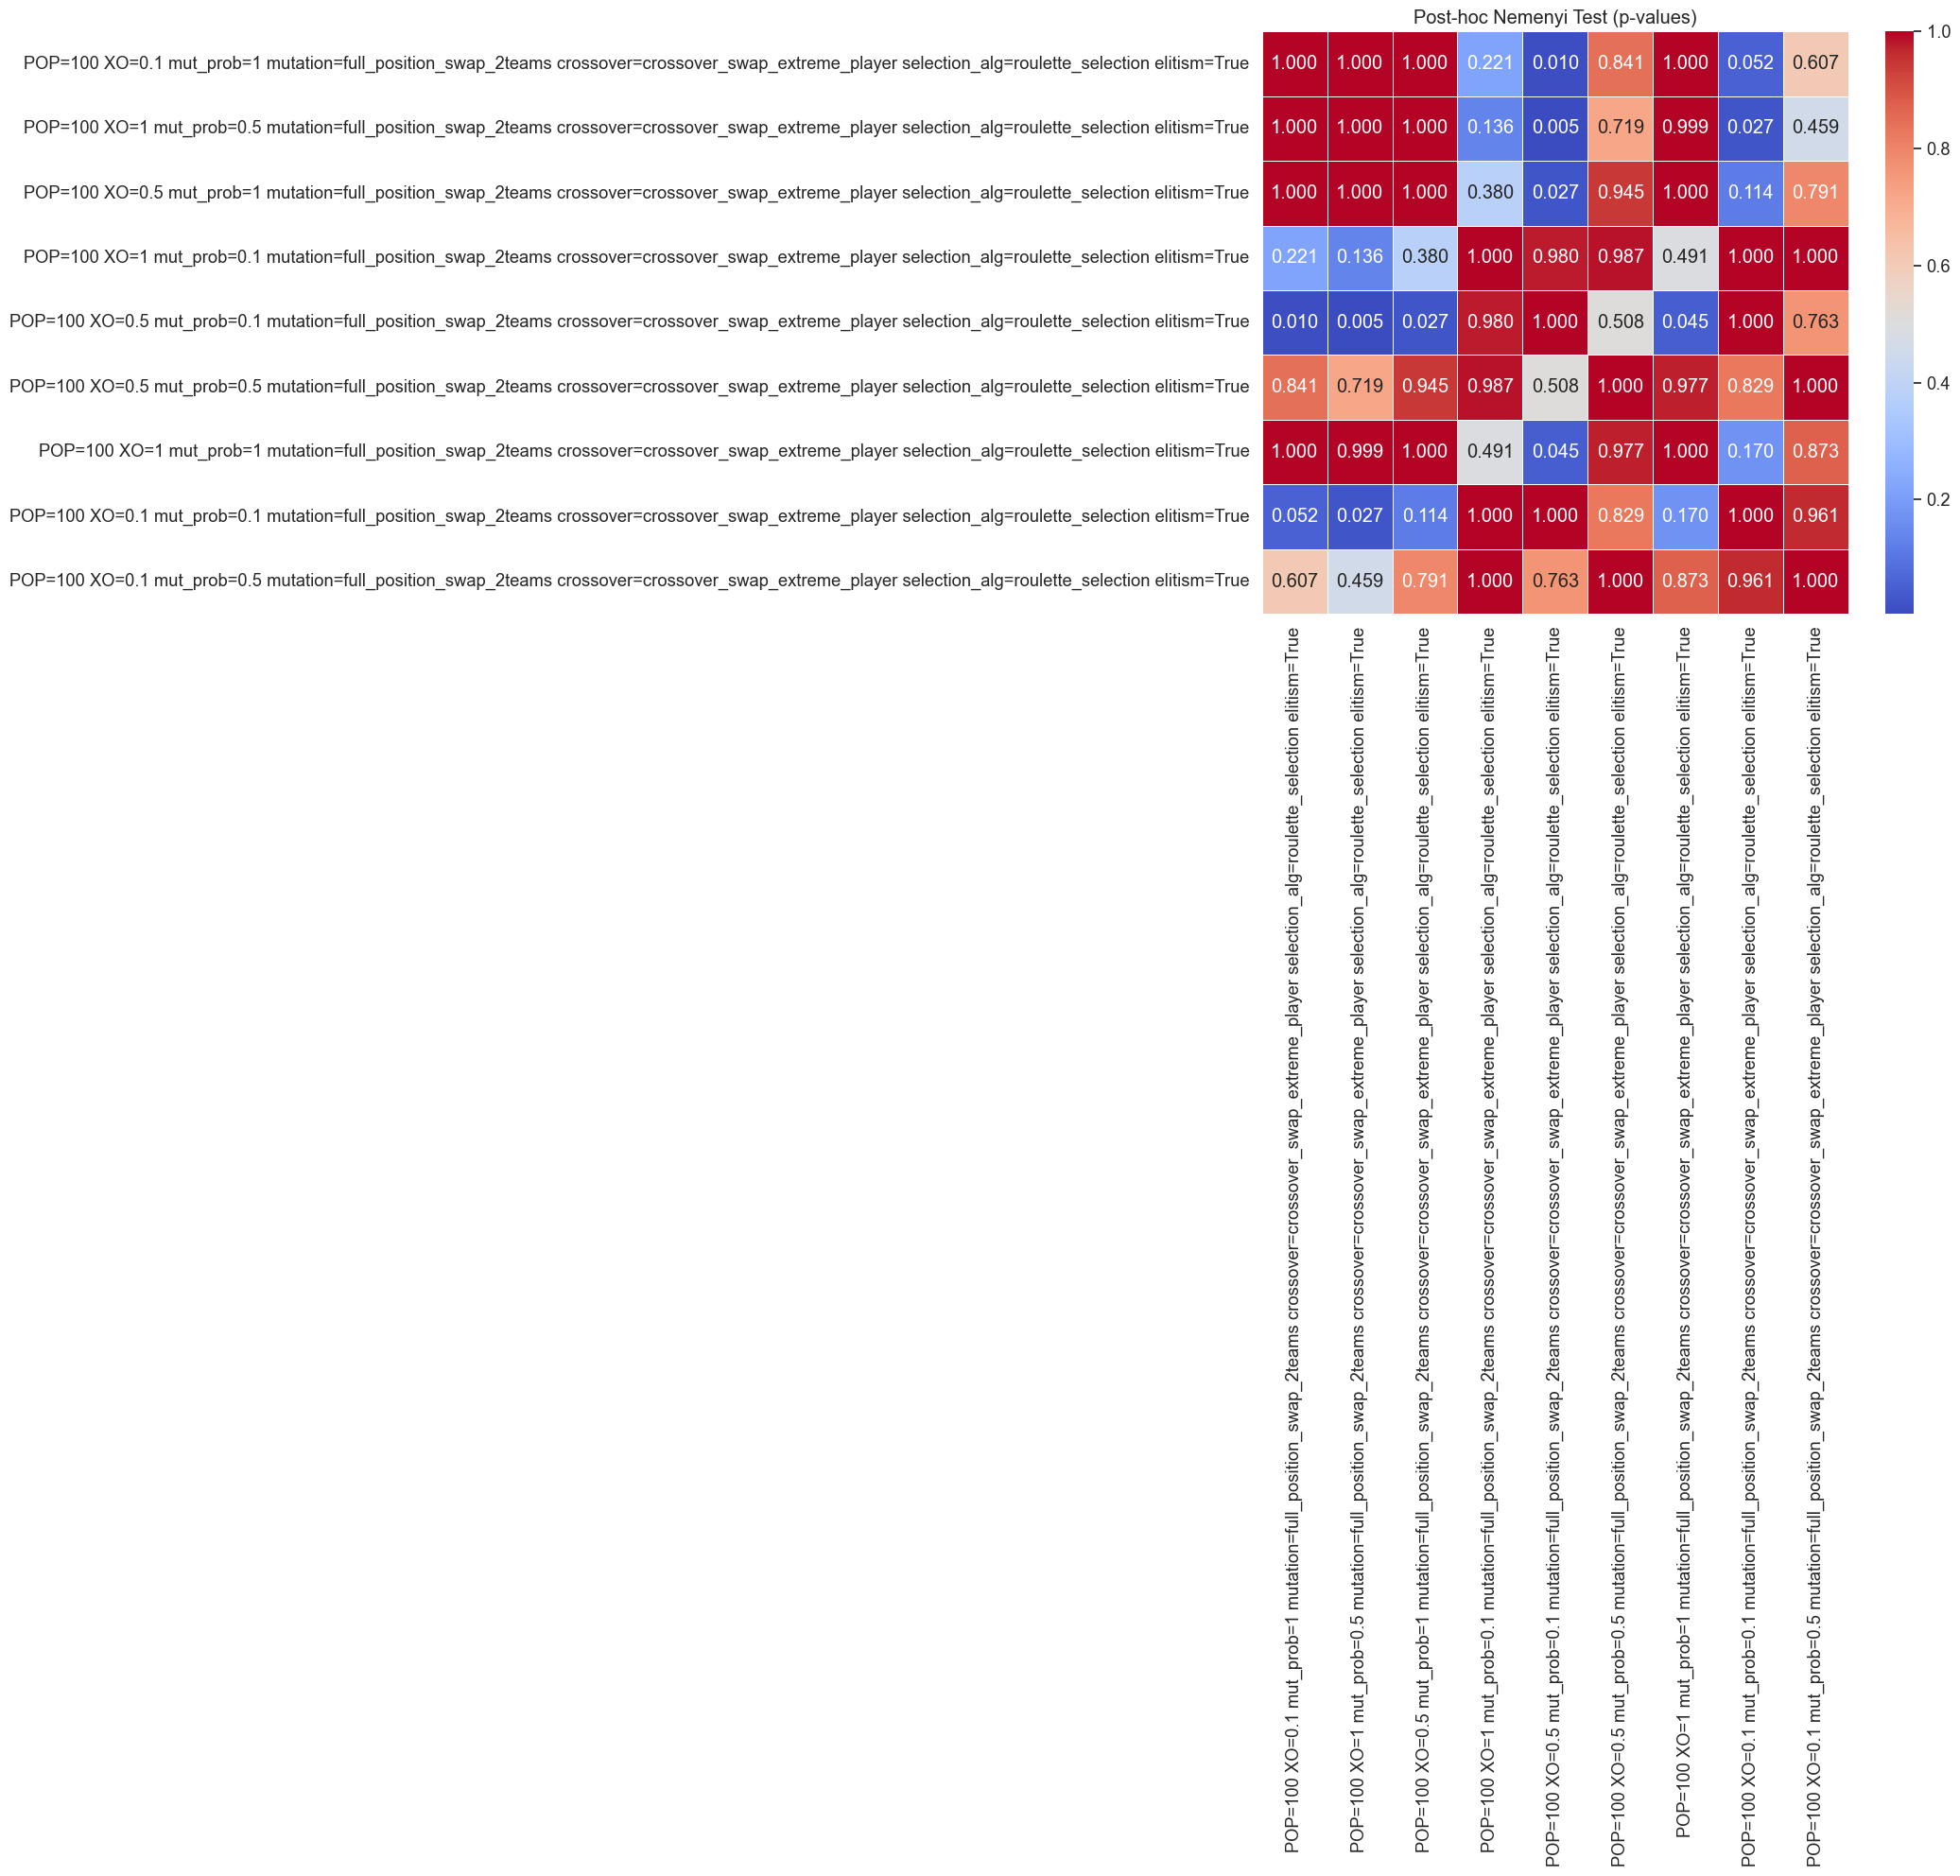

In [9]:
plot_posthoc_heatmap(posthoc_results)

In [10]:
summarize_significant_wins(posthoc_results)

,Significant Wins
POP=100 XO=0.5 mut_prob=0.1 mutation=full_position_swap_2teams crossover=crossover_swap_extreme_player selection_alg=roulette_selection elitism=True,4
POP=100 XO=1 mut_prob=0.5 mutation=full_position_swap_2teams crossover=crossover_swap_extreme_player selection_alg=roulette_selection elitism=True,2
POP=100 XO=0.1 mut_prob=1 mutation=full_position_swap_2teams crossover=crossover_swap_extreme_player selection_alg=roulette_selection elitism=True,1
POP=100 XO=0.5 mut_prob=1 mutation=full_position_swap_2teams crossover=crossover_swap_extreme_player selection_alg=roulette_selection elitism=True,1
POP=100 XO=1 mut_prob=1 mutation=full_position_swap_2teams crossover=crossover_swap_extreme_player selection_alg=roulette_selection elitism=True,1
POP=100 XO=0.1 mut_prob=0.1 mutation=full_position_swap_2teams crossover=crossover_swap_extreme_player selection_alg=roulette_selection elitism=True,1
POP=100 XO=1 mut_prob=0.1 mutation=full_position_swap_2teams crossover=crossover_swap_extreme_player selection_alg=roulette_selection elitism=True,0
POP=100 XO=0.5 mut_prob=0.5 mutation=full_position_swap_2teams crossover=crossover_swap_extreme_player selection_alg=roulette_selection elitism=True,0
POP=100 XO=0.1 mut_prob=0.5 mutation=full_position_swap_2teams crossover=crossover_swap_extreme_player selection_alg=roulette_selection elitism=True,0


The table gives a ranking based not just on performance, but on statistical confidence:
<br> Higher "Significant Wins" → more robust evidence that this configuration is truly better across multiple comparisons.
<br> Helps avoid picking a config just because of random variation in performance.

Config 1: It significantly beat 16 other configurations (with p < 0.05 in the Nemenyi test),
This suggests it’s a strong candidate for the best hyperparameter setup.

| XO Prob | Mut Prob | Significant Wins | Interpretation                                                                   |
| ------- | -------- | ---------------- | -------------------------------------------------------------------------------- |
| 0.5     | 0.1      | **4**            | Best-performing setup among this group. Balanced crossover and light mutation.   |
| 1.0     | 0.5      | 2                | Full crossover, moderate mutation — decent but not optimal.                      |
| 0.1     | 1.0      | 1                | Very high mutation rate, low crossover — unlikely to preserve good traits.       |
| 0.5     | 1.0      | 1                | High mutation disrupts optimization; still performs slightly better than others. |
| 1.0     | 1.0      | 1                | Excessive exploration likely hurt convergence stability.                         |
| 0.1     | 0.1      | 1                | Very conservative — might not explore enough to consistently win.                |
| 1.0     | 0.1      | 0                | Surprisingly underperforms — may converge prematurely.                           |
| 0.5     | 0.5      | 0                | Neither strong nor stable — mid-range settings not effective here.               |
| 0.1     | 0.5      | 0                | Low crossover with mid mutation shows weak synergy in this context.              |


### Analyzing only the best-performing configurations from slim_summary.csv

Missing file: fitness_logs_elit_final/POP=100 XO=1.0 mut_prob=0.5 mutation=full_position_swap_2teams crossover=crossover_swap_extreme_player selection_alg=roulette_selection elitism=True.csv
Missing file: fitness_logs_elit_final/POP=100 XO=0.1 mut_prob=1.0 mutation=full_position_swap_2teams crossover=crossover_swap_extreme_player selection_alg=roulette_selection elitism=True.csv
Missing file: fitness_logs_elit_final/POP=100 XO=0.5 mut_prob=1.0 mutation=full_position_swap_2teams crossover=crossover_swap_extreme_player selection_alg=roulette_selection elitism=True.csv


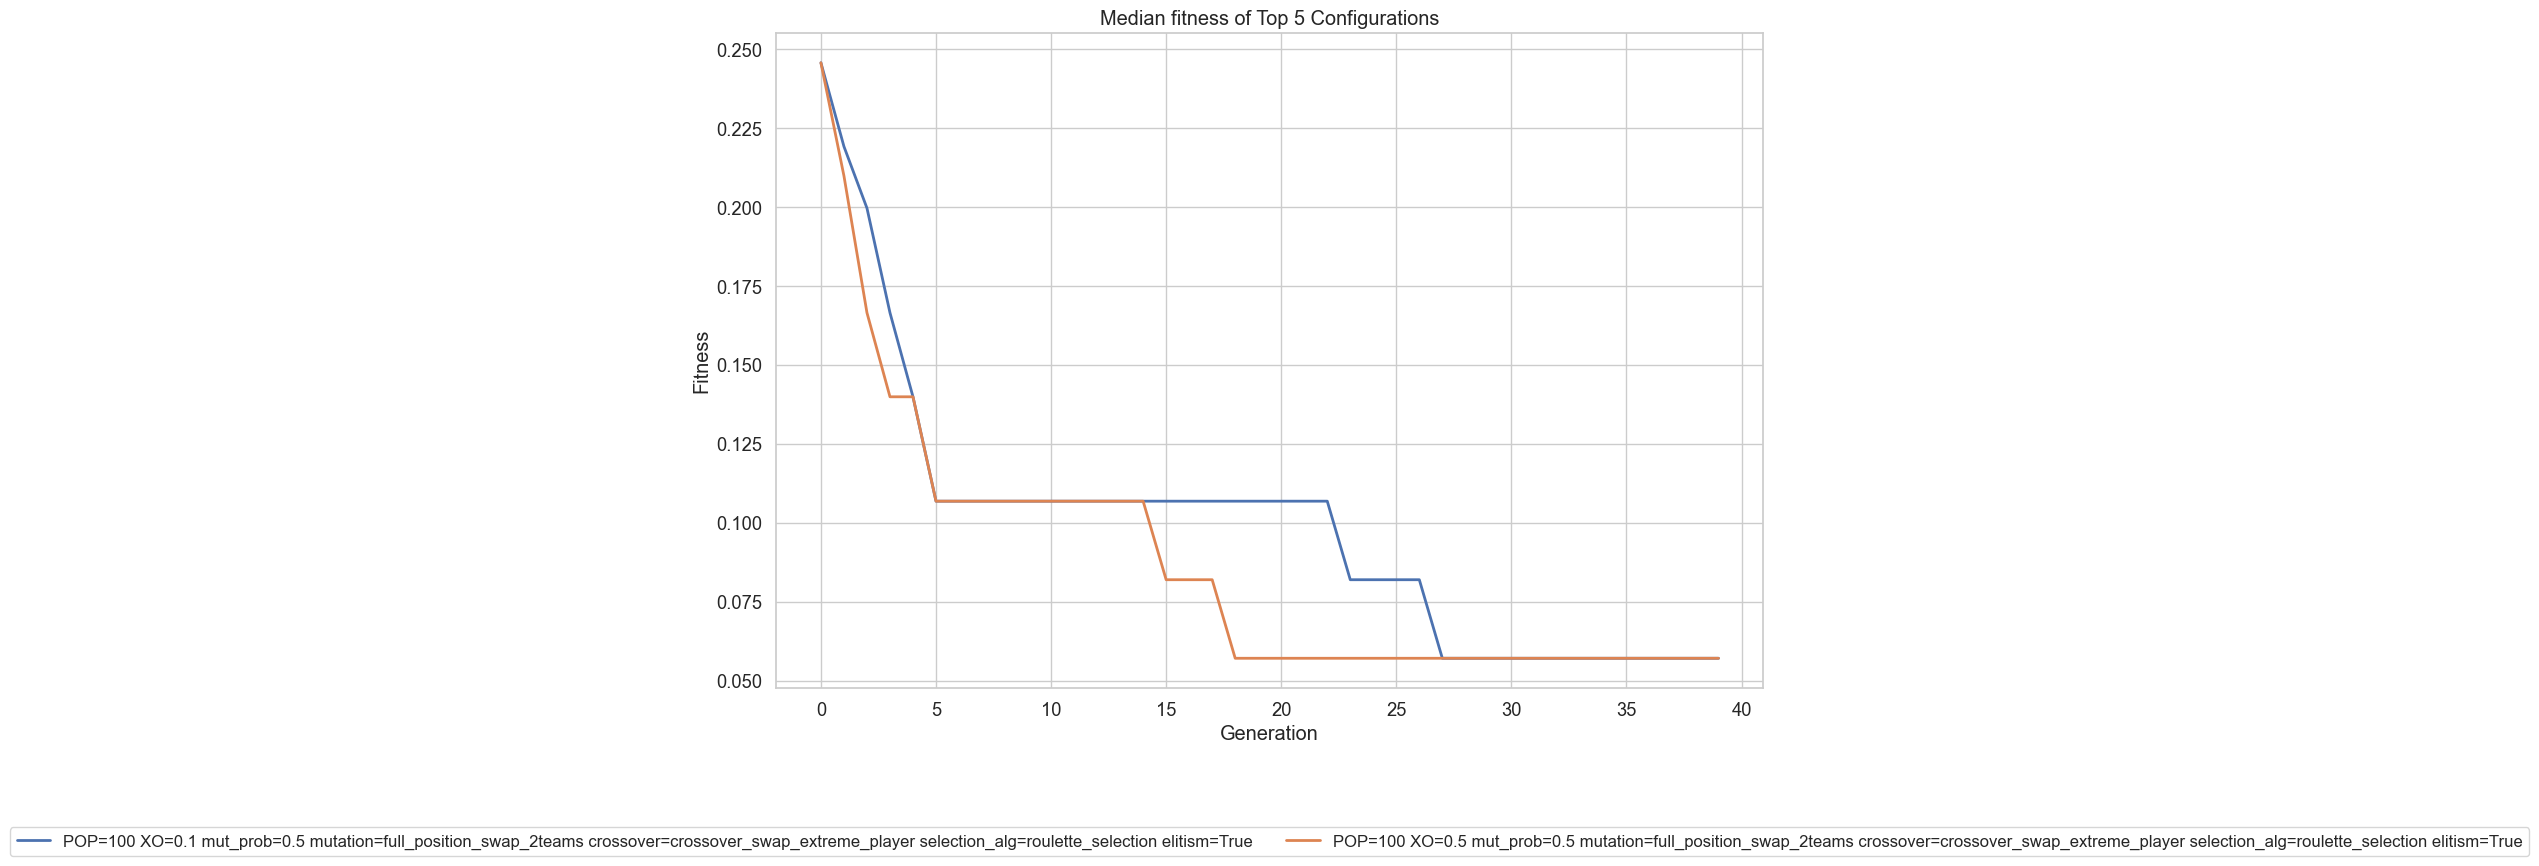

In [11]:
plot_top_configs(summary_path=summary_path,fitness_log_folder=fitness_path, top_n=5, metric='median_fitness')

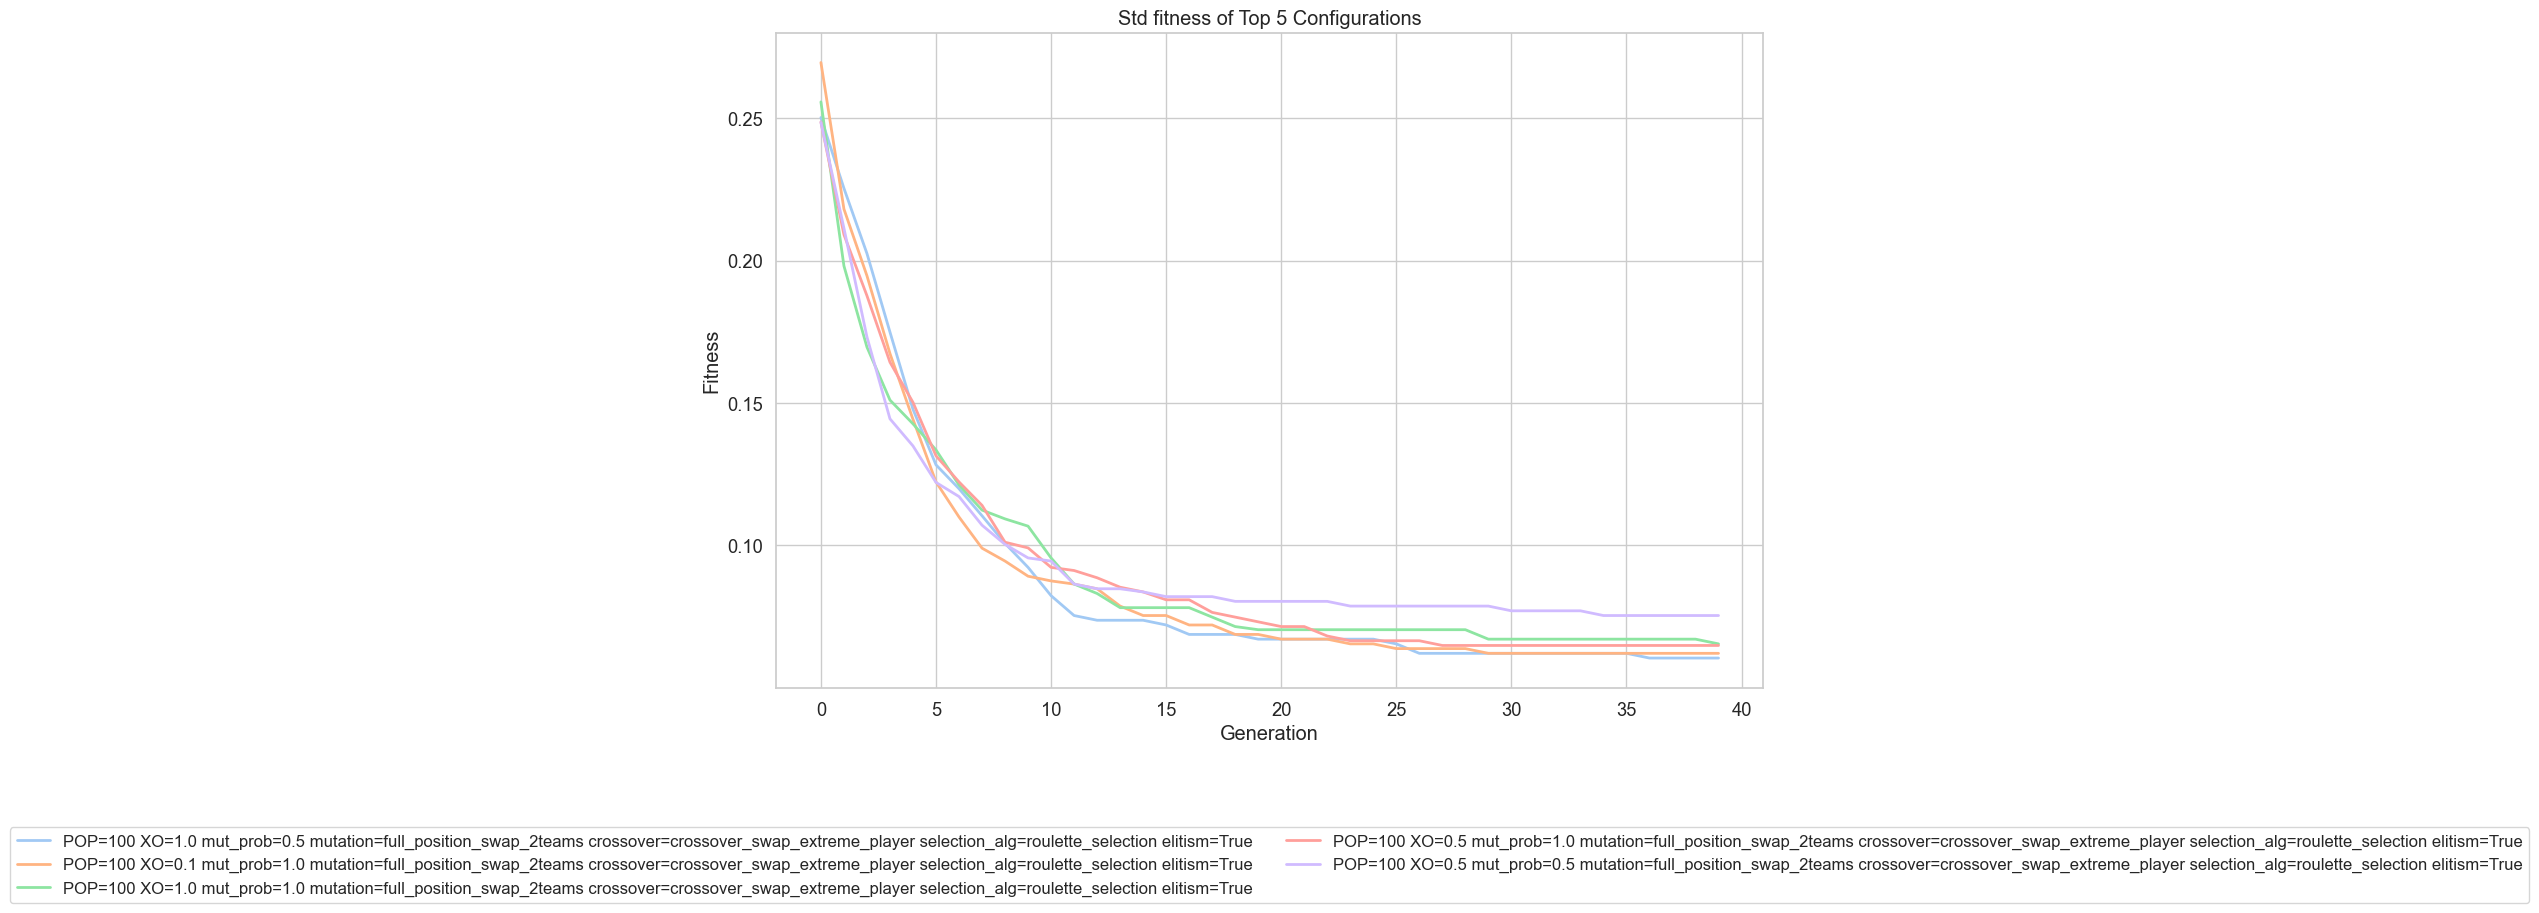

In [15]:
plot_top_configs(summary_path=summary_path,fitness_log_folder=fitness_path, top_n=5, metric="std_fitness")

/Users/juliakarpienia/Desktop/NOVA IMS /2nd sem/CIFO/CIFO_project_groupA/Operators/evaluation.py:214: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


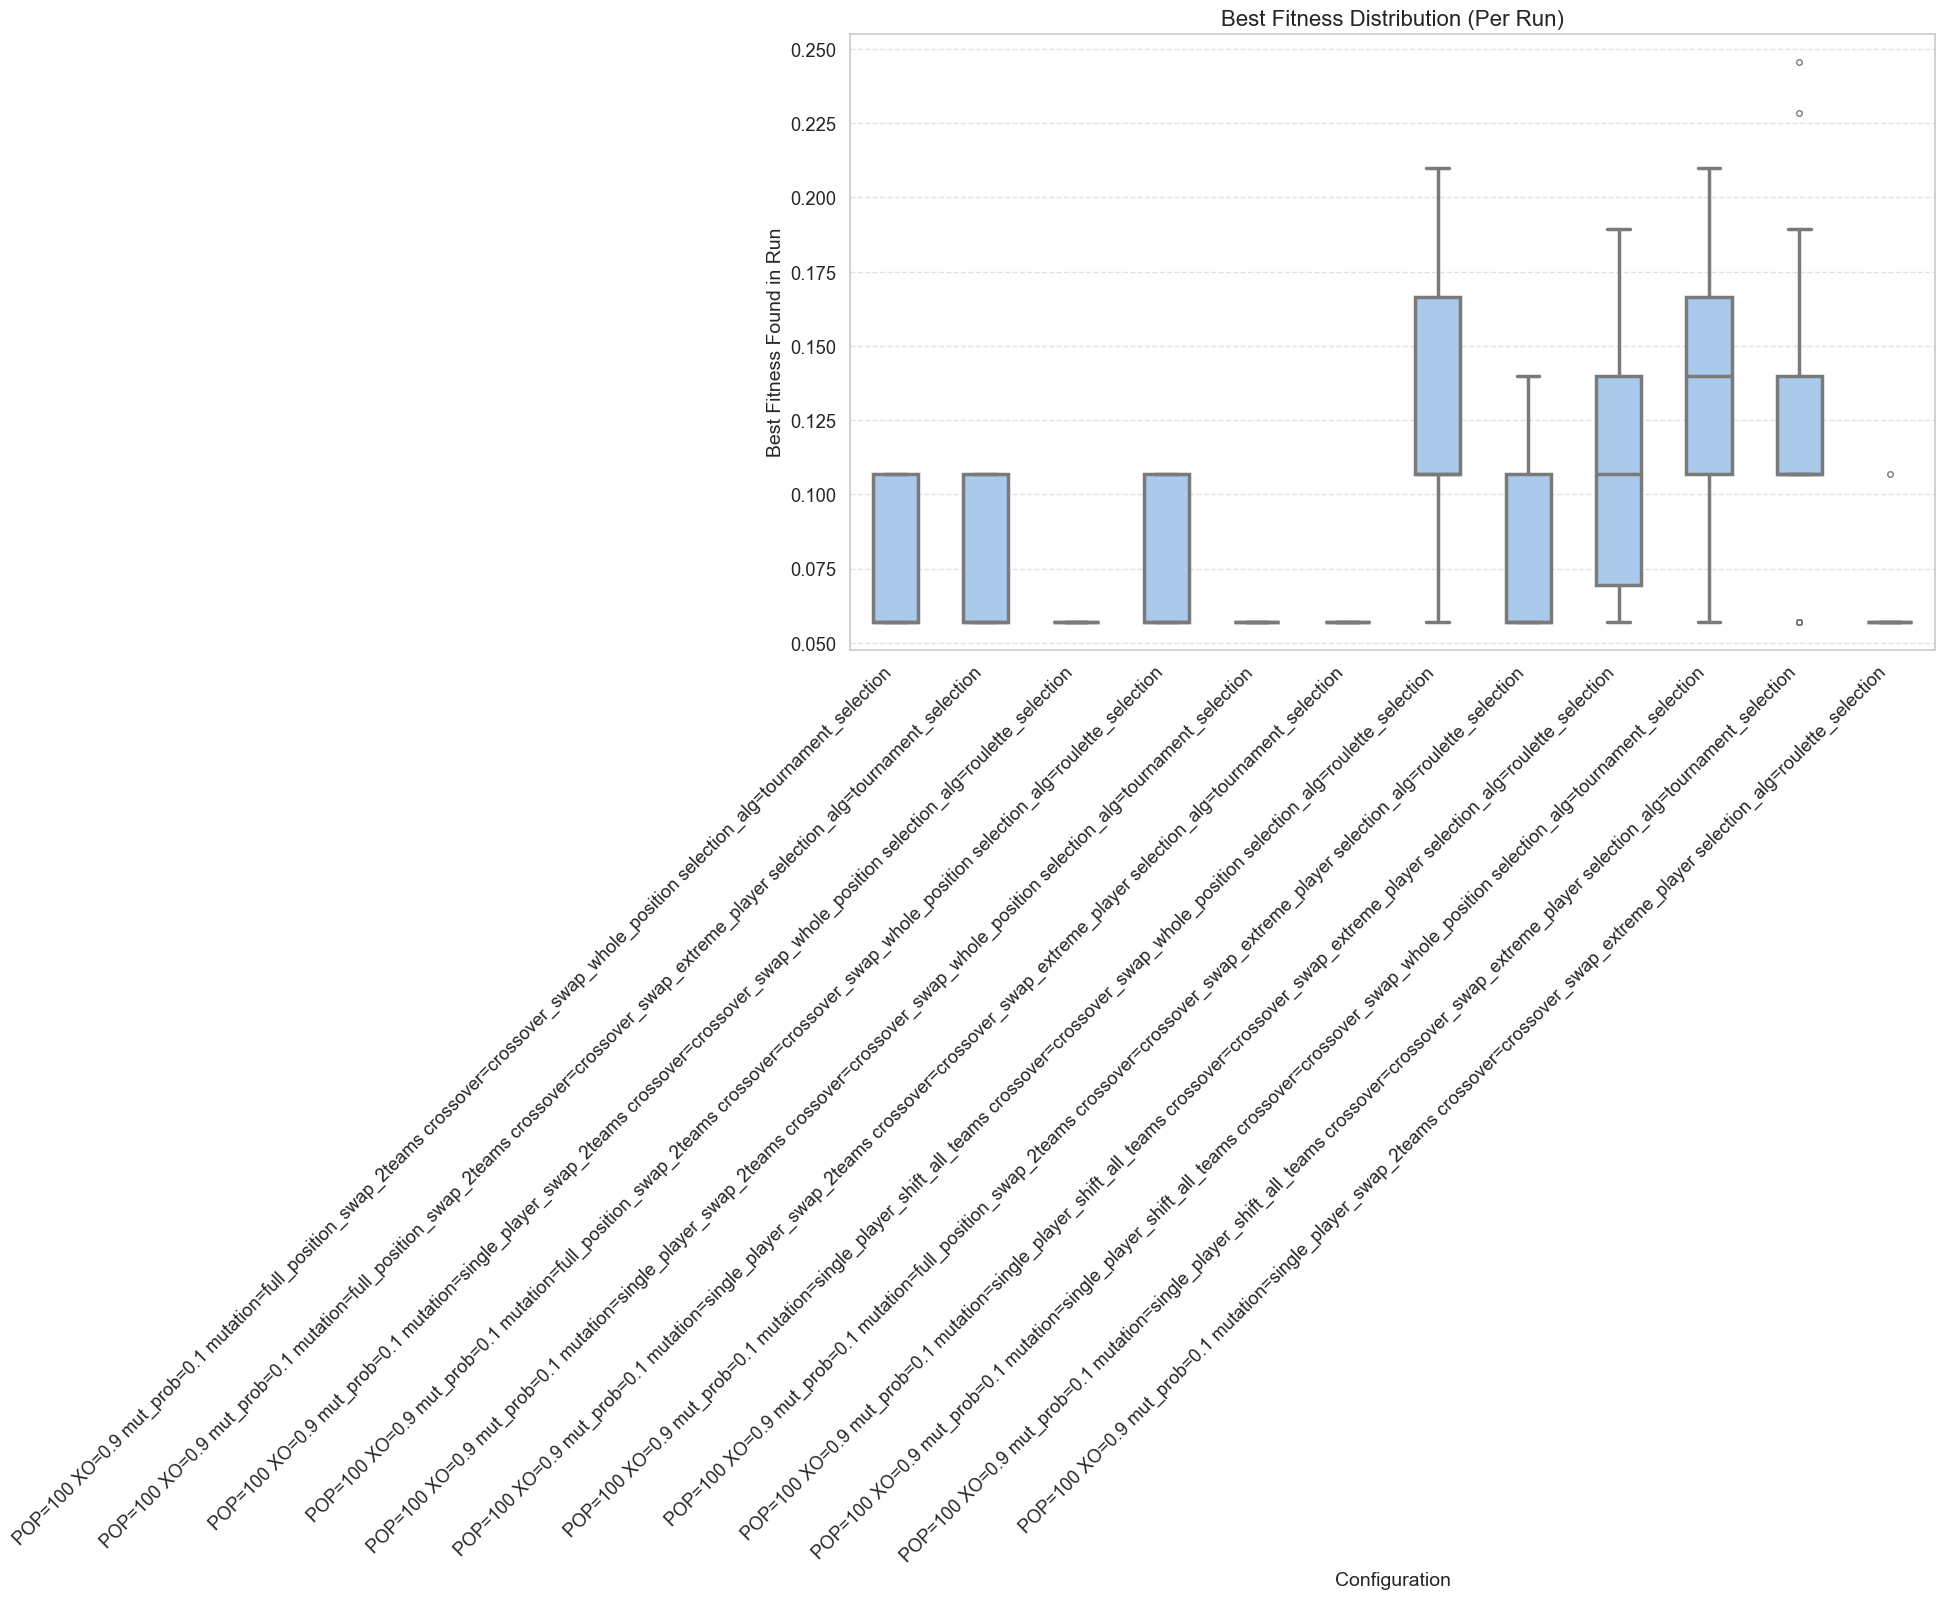

In [16]:
plot_best_fitness_boxplot()

### FINAL BEST PARAMETER CONFIGURATION

| Parameter           | Value                           |
| ------------------- | ------------------------------- |
| Population Size     | 100                             |
| Crossover Prob (XO) | **0.5**                         |
| Mutation Prob       | **0.1**                         |
| Mutation Operator   | `full_position_swap_2teams`     |
| Crossover Operator  | `crossover_swap_extreme_player` |
| Selection Algorithm | `roulette_selection`            |
| Elitism             | **True**                        |

